This is created after checking EM for GMM, based on old versions. Old versions are put in 'old' folder.

In [1]:
from __future__ import division
from numpy import linalg as LA
from onebox import *
import matplotlib.pyplot as plt

In [2]:
discount = 0.99
nq = 5
nr = 2
na = 2

In [3]:
beta = 2 * 10**-6   # .001     # available food dropped back into box after button press
gamma = .3                     # reward becomes available
epsilon = .1                   # available food disappears
rho = 1 - 2 * 10**-6 #.99      # food in mouth is consumed
pushButtonCost = 0.6
parameters = [beta, gamma, epsilon, rho, pushButtonCost]

# Genearte data (softmax policy)

In [4]:
T = 1000
N = 10
hiddenInitial = 1
#np.random.randint(nq)
obsInitial = 0
print(N, "samples are taken. Each sample has", T, "actions and accordingly", T+1, "observations\n")


10 samples are taken. Each sample has 1000 actions and accordingly 1001 observations



In [5]:
# First generate the observations (softmax policy)

oneboxdata = oneboxMDPdata(discount, nq, nr, na, parameters, T, N)
oneboxdata.dataGenerate_sfm(hiddenInitial, obsInitial)   #softmax policy

belief = oneboxdata.belief
action = oneboxdata.action
reward = oneboxdata.reward
trueState = oneboxdata.trueState


# sampleNum * sampleTime * dim of observations(=2 here, action, reward)
# shape of obsN: N*T*2
obsN = np.array([action, reward])   # includes the action and the observable states
obsN = np.rot90(obsN, 1)[::-1]                 # transform to the shape sampleNum * 2 * sampleTime
obsN = np.transpose(obsN, [0, 2, 1])  
#obs = obsN[0, :, :]    # take the first sample of sequence

latN = belief.copy()

In [ ]:
    # show data for optimal agent

    data_true = np.reshape(oneboxdata.trueState, oneboxdata.sampleTime)
    data_action = np.reshape(oneboxdata.action, oneboxdata.sampleTime)
    data_reward = np.reshape(oneboxdata.reward, oneboxdata.sampleTime)
    data_belief = np.reshape((oneboxdata.belief + 1 / 2) / float(nq), oneboxdata.sampleTime)
    data_hybrid = np.reshape(oneboxdata.hybrid, oneboxdata.sampleTime)

    actiontemp = data_action * (1 * (data_action % pb == 0)) / pb

    time = np.arange(0, oneboxdata.sampleTime, 1)
    if oneboxdata.sampleTime < 1000:
        fig = plt.figure(figsize=(20, 8))
        ax1 = fig.add_subplot(311)
        ax3 = fig.add_subplot(312)
        ax5 = fig.add_subplot(313)

        ax1.plot(time, actiontemp, 'b*', label='action')
        ax1.legend(loc=1)
        ax1.set_xticks(np.arange(0, oneboxdata.sampleTime, 5))
        ax1.set_xticks(np.arange(0, oneboxdata.sampleTime, 1), minor=True)
        ax1.set_yticks(np.arange(0, 3, 1))
        a = ax1.get_yticks().tolist()
        a[0] = 'NA'
        a[1] = 'pb'
        ax1.set_yticklabels(a)
        ax1.set_yticks(ax1.get_yticks()[0:2])
        ax1.grid(which='minor', alpha=0.5)
        ax1.grid(which='major', alpha=0.7)
        ax1.set_ylabel('action')

        ax2 = ax1.twinx()
        ax2.plot(time, data_reward, 'g', label='reward')
        ax2.legend(loc=1)
        ax2.set_xticks(np.arange(0, oneboxdata.sampleTime, 5))
        ax2.set_xticks(np.arange(0, oneboxdata.sampleTime, 1), minor=True)
        ax2.set_yticks(np.arange(0, 3, 1))
        ax2.grid(which='minor', alpha=0.5)
        ax2.grid(which='major', alpha=0.7)

        ax3.plot(time, data_true, 'c', label='trueState')
        ax3.legend(loc=1)
        ax3.set_xticks(np.arange(0, oneboxdata.sampleTime, 5))
        ax3.set_xticks(np.arange(0, oneboxdata.sampleTime, 1), minor=True)
        ax3.set_yticks(np.arange(0, 1.2))
        ax3.grid(which='minor', alpha=0.5)
        ax3.grid(which='major', alpha=0.7)

        ax5.plot(time, data_belief, 'm', label='belief')
        ax5.legend(loc=1)
        ax5.set_xticks(np.arange(0, oneboxdata.sampleTime, 5))
        ax5.set_xticks(np.arange(0, oneboxdata.sampleTime, 1), minor=True)
        ax5.set_yticks(np.arange(0, 1, 2 * 1 / float(nq)))
        ax5.set_yticks(np.arange(0, 1, 1 / float(nq)), minor=True)
        ax5.grid(which='minor', alpha=0.5)
        ax5.grid(which='major', alpha=0.7)
        ax5.set_ylabel('belief')

        plt.show()

In [ ]:
# write a high-dimensioanl data into a file

with file('latN_new.txt', 'w') as outfile:
    # I'm writing a header here just for the sake of readability
    # Any line starting with "#" will be ignored by numpy.loadtxt
    outfile.write('# Array shape: {0}\n'.format(belief.shape))

    # Iterating through a ndimensional array produces slices along
    # the last axis. This is equivalent to data[i,:,:] in this case
    for data_slice in belief:

        # The formatting string indicates that I'm writing out
        # the values in left-justified columns 7 characters in width
        # with 2 decimal places.  
        np.savetxt(outfile, data_slice, fmt='%-7.0f')

        # Writing out a break to indicate different slices...
        outfile.write('# New slice\n')

In [ ]:
# write a high-dimensioanl data into a file

with file('obsN_new.txt', 'w') as outfile:
    # I'm writing a header here just for the sake of readability
    # Any line starting with "#" will be ignored by numpy.loadtxt
    outfile.write('# Array shape: {0}\n'.format(obsN.shape))

    # Iterating through a ndimensional array produces slices along
    # the last axis. This is equivalent to data[i,:,:] in this case
    for data_slice in obsN:

        # The formatting string indicates that I'm writing out
        # the values in left-justified columns 7 characters in width
        # with 2 decimal places.  
        np.savetxt(outfile, data_slice, fmt='%-7.0f')

        # Writing out a break to indicate different slices...
        outfile.write('# New slice\n')

In [ ]:
# Read the array from disk

obs_data = np.loadtxt('obsN.txt')
# Note that this returned a 2D array!
#print new_data.shape

# However, going back to 3D is easy if we know the 
# original shape of the array
obs_data = obs_data.reshape((N, T, 2))

# Just to check that they're the same...
#np.all(obs_data == obsN)

In [ ]:
# Read the array from disk

lat_data = np.loadtxt('latN.txt')

# Note that this returned a 2D array!
#print new_data.shape

# However, going back to 3D is easy if we know the 
# original shape of the array
lat_data = lat_data.reshape((N, T))


In [ ]:
# Take only one sample at this time 
obsN = obs_data.astype(int)
obs = obsN[0, :, :]

latN = lat_data.astype(int)
lat = latN[0]

## Plot the Q contour (gamma and epsilon)

In [6]:
from matplotlib import cm

In [7]:
# Compute likelihood with ground truth latent

lat = latN[0]
obs = obsN[0, :, :] 


beta_ini = 2 * 10**-6
rho_ini = 1 - 2 * 10**-6
pushButtonCost_ini = 0.6

step1 = 0.02
step2 = 0.02
N1 = 20
N2 = 30

gammaValue = np.zeros(N1)
epsilonValue = np.zeros(N2)
Qaux1 = np.zeros((N2, N1))    # Likelihood with ground truth latent
Qaux2 = np.zeros((N2, N1))    # Expected complete data likelihood
Qaux3 = np.zeros((N2, N1))    # Entropy of latent posterior



for i in range(N1):
    gammaValue[i] = step1 * (i + 1)    
    for j in range(N2):
        epsilonValue[j] = step2 * (j + 1)   
        para = [beta_ini, gammaValue[i], epsilonValue[j], rho_ini, 0.6]
        
        onebox = oneboxMDP(discount, nq, nr, na, para)
        onebox.setupMDP()
        onebox.solveMDP_sfm()
        ThA = onebox.ThA
        policy = onebox.softpolicy
        pi = np.ones(nq)/nq  # initialize the estimation of the belief state
        oneboxHMM = HMMonebox(ThA, policy, pi)
        
        Qaux1[j, i] = oneboxHMM.likelihood(lat, obs, ThA, policy)
        Qaux2[j, i] = oneboxHMM.computeQaux(obs, ThA, policy) 
        Qaux3[j, i] = oneboxHMM.latent_entr(obs) 



In [8]:
Likelihood = Qaux2 + Qaux3

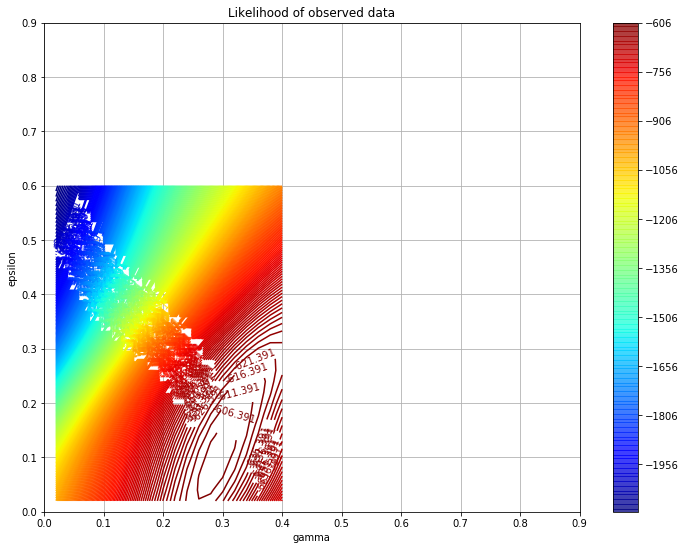

In [9]:
fig, ax = plt.subplots(figsize=(12, 9))
gammaValuemesh, epsilonValuemesh = np.meshgrid(gammaValue, epsilonValue)
cs3 = plt.contour(gammaValuemesh, epsilonValuemesh, Likelihood, 
                  np.arange(np.min(Likelihood), np.max(Likelihood), 5), cmap = cm.jet)
plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))
ax.grid()
ax.set_title('Likelihood of observed data')
plt.xlabel('gamma')
plt.ylabel('epsilon')
plt.clabel(cs3, inline=1, fontsize=10)
plt.colorbar()
plt.show()

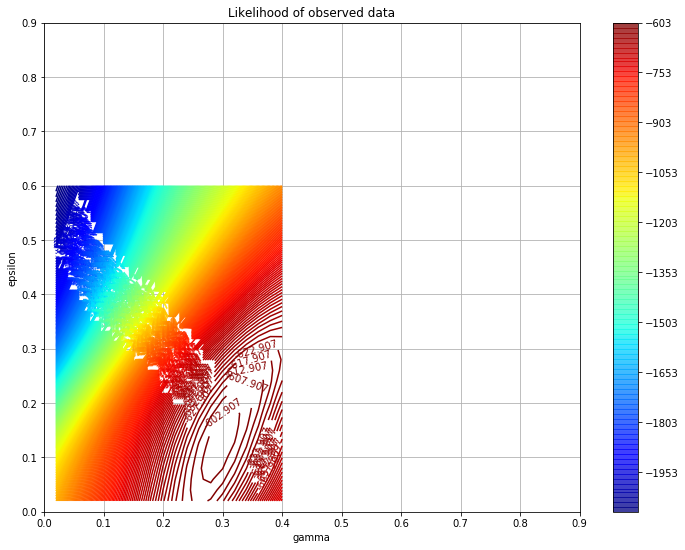

In [22]:
fig, ax = plt.subplots(figsize=(12, 9))
gammaValuemesh, epsilonValuemesh = np.meshgrid(gammaValue, epsilonValue)
cs3 = plt.contour(gammaValuemesh, epsilonValuemesh, Likelihood, 
                  np.arange(np.min(Likelihood), np.max(Likelihood), 5), cmap = cm.jet)
plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))
ax.grid()
ax.set_title('Likelihood of observed data')
plt.xlabel('gamma')
plt.ylabel('epsilon')
plt.clabel(cs3, inline=1, fontsize=10)
plt.colorbar()
plt.show()

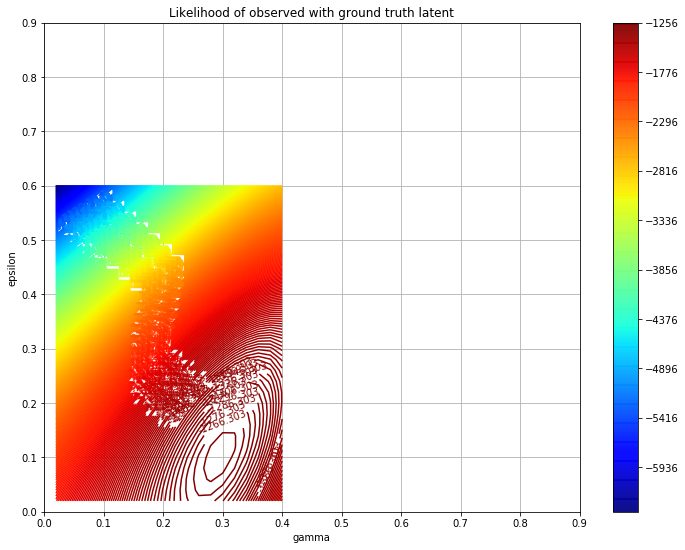

In [23]:
fig, ax = plt.subplots(figsize=(12, 9))
gammaValue1mesh, epsilonValue1mesh = np.meshgrid(gammaValue, epsilonValue)
cs1 = plt.contour(gammaValue1mesh, epsilonValue1mesh, Qaux1, 
                  np.arange(np.min(Qaux1), np.max(Qaux1), 10), cmap = cm.jet)
plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))
ax.grid()
ax.set_title('Likelihood of observed with ground truth latent')
plt.xlabel('gamma')
plt.ylabel('epsilon')
plt.clabel(cs1, inline=1, fontsize=10)
plt.colorbar()
plt.show()

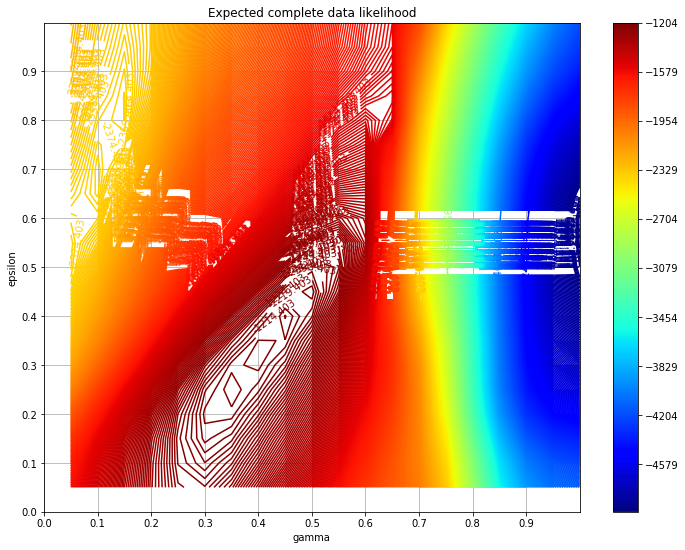

In [13]:
fig, ax = plt.subplots(figsize=(12, 9))
gammaValue2mesh, epsilonValue2mesh = np.meshgrid(gammaValue, epsilonValue)
cs = plt.contour(gammaValue2mesh, epsilonValue2mesh, Qaux2, 
                 np.arange(np.min(Qaux2), np.max(Qaux2), 5), cmap = cm.jet)
plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))
ax.grid()
ax.set_title('Expected complete data likelihood')
plt.xlabel('gamma')
plt.ylabel('epsilon')
plt.clabel(cs, inline=1, fontsize=10)
plt.colorbar()
plt.show()

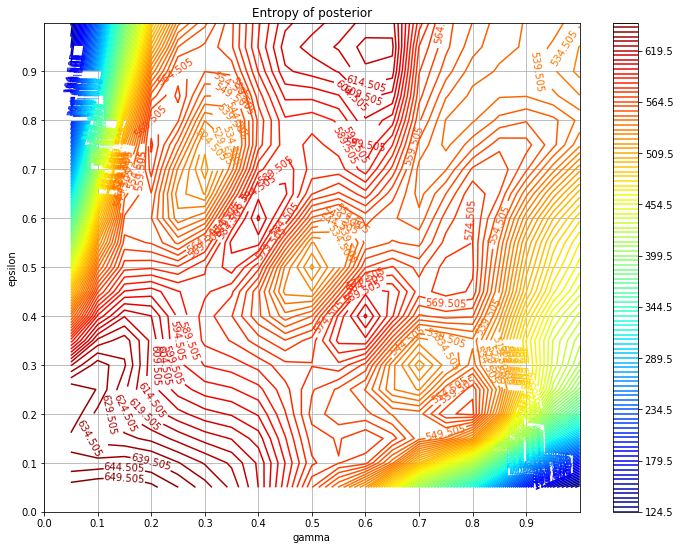

In [14]:
# Entropy of posterior
fig, ax = plt.subplots(figsize=(12, 9))
gammaValue3mesh, epsilonValue3mesh = np.meshgrid(gammaValue, epsilonValue)
cs1 = plt.contour(gammaValue3mesh, epsilonValue3mesh, Qaux3, 
                  np.arange(np.min(Qaux3), np.max(Qaux3), 5), cmap = cm.jet)
plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))
ax.grid()
ax.set_title('Entropy of posterior')
plt.xlabel('gamma')
plt.ylabel('epsilon')
plt.clabel(cs1, inline=1, fontsize=10)
plt.colorbar()
plt.show()

## EM (EG) algorithm

In [16]:
beta_ini = 2 * 10**-6
gamma_ini = 0.45
epsilon_ini = 0.3
rho_ini = 1 - 2 * 10**-6
pushButtonCost_ini = 0.6
    
parameters_ini = [beta_ini, gamma_ini, epsilon_ini, rho_ini, pushButtonCost_ini]
parameters_old = parameters_ini
    
print("The true paramters are:", parameters)
print("The initial estimation parameters are", parameters_old)
print("Now starting with some initialized value of the parameters, we are going to use EM(G) " \
"algorithm for parameter estimation:")

The true paramters are: [2e-06, 0.3, 0.1, 0.999998, 0.6]
The initial estimation parameters are [2e-06, 0.45, 0.3, 0.999998, 0.6]
Now starting with some initialized value of the parameters, we are going to use EM(G) algorithm for parameter estimation:


In [19]:
NN1 = 100   # iteration number for the EM algorithm
eps = 10 ** -6

para_old_traj = []
para_new_traj = []

log_likelihoods_old = []
log_likelihoods_new = []
log_likelihoods_com_old = []    # old posterior, old parameters
log_likelihoods_com_new = []    # old posterior, new parameters
latent_entropies = []

count_E = 0
while count_E < NN1:
    
    print ('\nThe', count_E, '-th iteration of the EM(G) algorithm')       

    if count_E == 0:
        parameters_old = [beta_ini, gamma_ini, epsilon_ini, rho_ini, pushButtonCost_ini]
    else:
        parameters_old = np.copy(parameters_new)   # update parameters
    
    para_old_traj.append(np.array([parameters_old[1], parameters_old[2]]))  
    print (parameters_old)
    
    ##########  E-step ##########
    
    ## Use old parameters to estimate posterior
    oneboxGra = oneboxMDPder(discount, nq, nr, na, parameters_old)
    ThA_old = oneboxGra.ThA
    softpolicy_old = oneboxGra.softpolicy
    pi = np.ones(nq) / nq 
    oneHMM = HMMonebox(ThA_old, softpolicy_old, pi)
    
    ## Calculate likelihood of observed and complete date, and entropy of the latent sequence
    complete_likelihood_old = oneHMM.computeQaux(obs, ThA_old, softpolicy_old) 
    latent_entropy = oneHMM.latent_entr(obs) 
    log_likelihood = complete_likelihood_old + latent_entropy
    
    log_likelihoods_com_old.append(complete_likelihood_old)
    latent_entropies.append(latent_entropy)
    log_likelihoods_old.append(log_likelihood)
    
    print (complete_likelihood_old)
    print (log_likelihood)
    
    ## Check convergence
    if len(log_likelihoods_old) >= 2 and np.abs(log_likelihood - log_likelihoods_old[-2]) < eps:
        print ('EM has converged!')
        break
    
    
    ##########  M(G)-step ##########
    
    count_M = 0
    para_new_traj.append([])
    log_likelihoods_com_new.append([])
    log_likelihoods_new.append([])
    stepsize = 5 * 10 ** -6
    
    # Start the gradient descent from the old parameters
    parameters_new = np.copy(parameters_old)
    complete_likelihood_new = complete_likelihood_old
    likelihood = complete_likelihood_new + latent_entropy
    
    print ('\n M-step ')
    print (parameters_new)
    print (complete_likelihood_new)
    print (likelihood)
    
    while True:
        para_new_traj[count_E].append(np.array([parameters_new[1], parameters_new[2]]))
        log_likelihoods_com_new[count_E].append(complete_likelihood_new)
        log_likelihoods_new[count_E].append(likelihood)
        #print log_likelihoods_new
        
        ## Go the potential next point with gradient descent
        para_temp = parameters_new + stepsize * np.array(oneboxGra.dQauxdpara_sim(obs, parameters_new))
        temp = np.copy(para_temp)
        para_temp = np.copy(parameters_old)
        para_temp[1] = temp[1]
        para_temp[2] = temp[2]
        
        ## Check the ECDLL (old posterior, new parameters)
        onebox_new = oneboxMDP(discount, nq, nr, na, para_temp)
        onebox_new.setupMDP()
        onebox_new.solveMDP_sfm()
        ThA_new = onebox_new.ThA
        softpolicy_new = onebox_new.softpolicy
        complete_likelihood_new_temp = oneHMM.computeQaux(obs, ThA_new, softpolicy_new)
        
        ## Update the parameter if the ECDLL can be improved
        if complete_likelihood_new_temp > complete_likelihood_new:
            parameters_new = np.copy(para_temp)
            complete_likelihood_new = complete_likelihood_new_temp
            likelihood = complete_likelihood_new + latent_entropy
            
            print (parameters_new)
            print (complete_likelihood_new)
            print (likelihood)
        
            count_M += 1
        else:
            break
              
    count_E += 1



The 0 -th iteration of the EM(G) algorithm
[2e-06, 0.45, 0.3, 0.999998, 0.6]
-1226.9889094752557
-650.9281090963304

 M-step 
[2.00000e-06 4.50000e-01 3.00000e-01 9.99998e-01 6.00000e-01]
-1226.9889094752557
-650.9281090963304
[2.00000000e-06 4.45999807e-01 3.01394385e-01 9.99998000e-01
 6.00000000e-01]
-1223.7979611187377
-647.7371607398125
[2.00000000e-06 4.42832025e-01 3.02324595e-01 9.99998000e-01
 6.00000000e-01]
-1221.8535977092267
-645.7927973303015
[2.00000000e-06 4.40304094e-01 3.02903079e-01 9.99998000e-01
 6.00000000e-01]
-1220.6489979647774
-644.5881975858522
[2.00000000e-06 4.38270306e-01 3.03215966e-01 9.99998000e-01
 6.00000000e-01]
-1219.8864100478122
-643.825609668887
[2.00000000e-06 4.36619682e-01 3.03329288e-01 9.99998000e-01
 6.00000000e-01]
-1219.3898949946827
-643.3290946157574
[2.00000000e-06 4.35267295e-01 3.03293683e-01 9.99998000e-01
 6.00000000e-01]
-1219.055006527163
-642.9942061482377
[2.00000000e-06 4.34147923e-01 3.03147973e-01 9.99998000e-01
 6.00000000

[2.00000000e-06 4.23077587e-01 2.90911355e-01 9.99998000e-01
 6.00000000e-01]
-1217.4165802426794
-641.3557798637542
[2.00000000e-06 4.23047020e-01 2.90860955e-01 9.99998000e-01
 6.00000000e-01]
-1217.4158993045398
-641.3550989256146
[2.0000000e-06 4.2301760e-01 2.9081244e-01 9.9999800e-01 6.0000000e-01]
-1217.4152684584042
-641.3544680794789
[2.00000000e-06 4.22989285e-01 2.90765741e-01 9.99998000e-01
 6.00000000e-01]
-1217.4146840098854
-641.3538836309601
[2.00000000e-06 4.22962033e-01 2.90720789e-01 9.99998000e-01
 6.00000000e-01]
-1217.4141425383916
-641.3533421594664
[2.00000000e-06 4.22935803e-01 2.90677518e-01 9.99998000e-01
 6.00000000e-01]
-1217.4136408762436
-641.3528404973183
[2.00000000e-06 4.22910557e-01 2.90635866e-01 9.99998000e-01
 6.00000000e-01]
-1217.413176090523
-641.3523757115977
[2.00000000e-06 4.22886258e-01 2.90595770e-01 9.99998000e-01
 6.00000000e-01]
-1217.4127454647378
-641.3519450858125
[2.00000000e-06 4.22862869e-01 2.90557174e-01 9.99998000e-01
 6.0000000

[2.00000000e-06 4.22315180e-01 2.89652215e-01 9.99998000e-01
 6.00000000e-01]
-1217.4073523187296
-641.3465519398044
[2.00000000e-06 4.22313130e-01 2.89648823e-01 9.99998000e-01
 6.00000000e-01]
-1217.4073493004264
-641.3465489215012
[2.00000000e-06 4.22311156e-01 2.89645558e-01 9.99998000e-01
 6.00000000e-01]
-1217.4073465050756
-641.3465461261503
[2.00000000e-06 4.22309255e-01 2.89642414e-01 9.99998000e-01
 6.00000000e-01]
-1217.4073439162657
-641.3465435373405
[2.00000000e-06 4.22307426e-01 2.89639387e-01 9.99998000e-01
 6.00000000e-01]
-1217.4073415188425
-641.3465411399172
[2.00000000e-06 4.22305665e-01 2.89636473e-01 9.99998000e-01
 6.00000000e-01]
-1217.4073392987414
-641.3465389198161
[2.00000000e-06 4.22303969e-01 2.89633667e-01 9.99998000e-01
 6.00000000e-01]
-1217.407337242893
-641.3465368639677
[2.00000000e-06 4.22302336e-01 2.89630966e-01 9.99998000e-01
 6.00000000e-01]
-1217.4073353392296
-641.3465349603043
[2.00000000e-06 4.22300764e-01 2.89628366e-01 9.99998000e-01
 6.0

[2.00000000e-06 4.22263844e-01 2.89567280e-01 9.99998000e-01
 6.00000000e-01]
-1217.4073119484588
-641.3465115695335
[2.00000000e-06 4.22263706e-01 2.89567050e-01 9.99998000e-01
 6.00000000e-01]
-1217.4073119387358
-641.3465115598106
[2.00000000e-06 4.22263572e-01 2.89566830e-01 9.99998000e-01
 6.00000000e-01]
-1217.4073119298785
-641.3465115509532
[2.00000000e-06 4.22263444e-01 2.89566617e-01 9.99998000e-01
 6.00000000e-01]
-1217.4073119218212
-641.346511542896
[2.00000000e-06 4.22263320e-01 2.89566412e-01 9.99998000e-01
 6.00000000e-01]
-1217.407311914499
-641.3465115355737
[2.00000000e-06 4.22263201e-01 2.89566215e-01 9.99998000e-01
 6.00000000e-01]
-1217.40731190785
-641.3465115289248
[2.00000000e-06 4.22263086e-01 2.89566025e-01 9.99998000e-01
 6.00000000e-01]
-1217.40731190182
-641.3465115228948
[2.00000000e-06 4.22262976e-01 2.89565843e-01 9.99998000e-01
 6.00000000e-01]
-1217.4073118963643
-641.346511517439
[2.00000000e-06 4.22262870e-01 2.89565667e-01 9.99998000e-01
 6.0000000

[2.00000000e-06 4.02342252e-01 2.80419896e-01 9.99998000e-01
 6.00000000e-01]
-1209.8083584706774
-628.2954504400775
[2.00000000e-06 4.02235454e-01 2.80231608e-01 9.99998000e-01
 6.00000000e-01]
-1209.7991609256892
-628.2862528950893
[2.00000000e-06 4.02132623e-01 2.80050136e-01 9.99998000e-01
 6.00000000e-01]
-1209.7906213326492
-628.2777133020493
[2.00000000e-06 4.02033599e-01 2.79875234e-01 9.99998000e-01
 6.00000000e-01]
-1209.7826920677246
-628.2697840371247
[2.00000000e-06 4.01938230e-01 2.79706661e-01 9.99998000e-01
 6.00000000e-01]
-1209.7753290168037
-628.2624209862038
[2.00000000e-06 4.01846373e-01 2.79544187e-01 9.99998000e-01
 6.00000000e-01]
-1209.7684913055982
-628.2555832749983
[2.00000000e-06 4.01757890e-01 2.79387589e-01 9.99998000e-01
 6.00000000e-01]
-1209.762141056585
-628.2492330259852
[2.00000000e-06 4.01672651e-01 2.79236653e-01 9.99998000e-01
 6.00000000e-01]
-1209.7562431664448
-628.243335135845
[2.00000000e-06 4.01590532e-01 2.79091170e-01 9.99998000e-01
 6.00

[2.00000000e-06 3.99613831e-01 2.75573825e-01 9.99998000e-01
 6.00000000e-01]
-1209.679492271239
-628.1665842406392
[2.00000000e-06 3.99605904e-01 2.75559667e-01 9.99998000e-01
 6.00000000e-01]
-1209.6794408042695
-628.1665327736696
[2.00000000e-06 3.99598259e-01 2.75546014e-01 9.99998000e-01
 6.00000000e-01]
-1209.6793929413263
-628.1664849107265
[2.00000000e-06 3.99590885e-01 2.75532845e-01 9.99998000e-01
 6.00000000e-01]
-1209.6793484300615
-628.1664403994616
[2.00000000e-06 3.99583775e-01 2.75520145e-01 9.99998000e-01
 6.00000000e-01]
-1209.679307035919
-628.1663990053191
[2.00000000e-06 3.99576917e-01 2.75507896e-01 9.99998000e-01
 6.00000000e-01]
-1209.679268540632
-628.1663605100321
[2.00000000e-06 3.99570303e-01 2.75496083e-01 9.99998000e-01
 6.00000000e-01]
-1209.67923274133
-628.1663247107301
[2.00000000e-06 3.99563924e-01 2.75484690e-01 9.99998000e-01
 6.00000000e-01]
-1209.6791994493565
-628.1662914187566
[2.00000000e-06 3.99557773e-01 2.75473702e-01 9.99998000e-01
 6.00000

[2.00000000e-06 3.99407894e-01 2.75205915e-01 9.99998000e-01
 6.00000000e-01]
-1209.6787623681716
-628.1658543375718
[2.00000000e-06 3.99407287e-01 2.75204829e-01 9.99998000e-01
 6.00000000e-01]
-1209.6787620829239
-628.165854052324
[2.00000000e-06 3.99406700e-01 2.75203781e-01 9.99998000e-01
 6.00000000e-01]
-1209.6787618182266
-628.1658537876267
[2.00000000e-06 3.99406135e-01 2.75202771e-01 9.99998000e-01
 6.00000000e-01]
-1209.6787615726205
-628.1658535420206
[2.00000000e-06 3.99405590e-01 2.75201796e-01 9.99998000e-01
 6.00000000e-01]
-1209.6787613447532
-628.1658533141533
[2.00000000e-06 3.99405064e-01 2.75200856e-01 9.99998000e-01
 6.00000000e-01]
-1209.6787611333666
-628.1658531027667
[2.00000000e-06 3.99404556e-01 2.75199949e-01 9.99998000e-01
 6.00000000e-01]
-1209.6787609372818
-628.165852906682
[2.00000000e-06 3.99404067e-01 2.75199075e-01 9.99998000e-01
 6.00000000e-01]
-1209.678760755419
-628.1658527248192
[2.00000000e-06 3.99403595e-01 2.75198231e-01 9.99998000e-01
 6.000

[2.00000000e-06 3.99392087e-01 2.75177664e-01 9.99998000e-01
 6.00000000e-01]
-1209.678758526622
-628.1658504960221
[2.0000000e-06 3.9939204e-01 2.7517758e-01 9.9999800e-01 6.0000000e-01]
-1209.6787585262946
-628.1658504956947
[2.00000000e-06 3.99391995e-01 2.75177500e-01 9.99998000e-01
 6.00000000e-01]
-1209.6787585260404
-628.1658504954405
[2.00000000e-06 3.99391952e-01 2.75177422e-01 9.99998000e-01
 6.00000000e-01]
-1209.6787585258498
-628.16585049525
[2.00000000e-06 3.99391910e-01 2.75177347e-01 9.99998000e-01
 6.00000000e-01]
-1209.6787585257264
-628.1658504951265
[2.00000000e-06 3.99391869e-01 2.75177275e-01 9.99998000e-01
 6.00000000e-01]
-1209.6787585256502
-628.1658504950503
[2.00000000e-06 3.99391830e-01 2.75177205e-01 9.99998000e-01
 6.00000000e-01]
-1209.6787585256225
-628.1658504950226

The 2 -th iteration of the EM(G) algorithm
[2.00000000e-06 3.99391830e-01 2.75177205e-01 9.99998000e-01
 6.00000000e-01]
-1210.561453595148
-623.3864958652985

 M-step 
[2.00000000e-06 3.99

[2.00000000e-06 3.81119931e-01 2.60750009e-01 9.99998000e-01
 6.00000000e-01]
-1206.682440325877
-619.5074825960276
[2.00000000e-06 3.81075880e-01 2.60666782e-01 9.99998000e-01
 6.00000000e-01]
-1206.6806981787558
-619.5057404489064
[2.00000000e-06 3.81033320e-01 2.60586363e-01 9.99998000e-01
 6.00000000e-01]
-1206.6790717504812
-619.5041140206317
[2.00000000e-06 3.80992200e-01 2.60508658e-01 9.99998000e-01
 6.00000000e-01]
-1206.6775533114806
-619.5025955816311
[2.00000000e-06 3.80952471e-01 2.60433573e-01 9.99998000e-01
 6.00000000e-01]
-1206.6761356529853
-619.5011779231359
[2.00000000e-06 3.80914084e-01 2.60361019e-01 9.99998000e-01
 6.00000000e-01]
-1206.67481205199
-619.4998543221407
[2.00000000e-06 3.80876995e-01 2.60290910e-01 9.99998000e-01
 6.00000000e-01]
-1206.6735762364222
-619.4986185065727
[2.00000000e-06 3.80841158e-01 2.60223163e-01 9.99998000e-01
 6.00000000e-01]
-1206.6724223560827
-619.4974646262333
[2.00000000e-06 3.80806531e-01 2.60157697e-01 9.99998000e-01
 6.000

[2.00000000e-06 3.79926162e-01 2.58491492e-01 9.99998000e-01
 6.00000000e-01]
-1206.656325294892
-619.4813675650425
[2.00000000e-06 3.79922254e-01 2.58484088e-01 9.99998000e-01
 6.00000000e-01]
-1206.6563116318057
-619.4813539019563
[2.00000000e-06 3.79918476e-01 2.58476931e-01 9.99998000e-01
 6.00000000e-01]
-1206.6562988697945
-619.481341139945
[2.00000000e-06 3.79914825e-01 2.58470013e-01 9.99998000e-01
 6.00000000e-01]
-1206.656286949512
-619.4813292196625
[2.00000000e-06 3.79911295e-01 2.58463326e-01 9.99998000e-01
 6.00000000e-01]
-1206.6562758155467
-619.4813180856972
[2.00000000e-06 3.79907884e-01 2.58456863e-01 9.99998000e-01
 6.00000000e-01]
-1206.6562654161198
-619.4813076862704
[2.00000000e-06 3.79904586e-01 2.58450615e-01 9.99998000e-01
 6.00000000e-01]
-1206.6562557028458
-619.4812979729963
[2.00000000e-06 3.79901398e-01 2.58444576e-01 9.99998000e-01
 6.00000000e-01]
-1206.6562466305563
-619.4812889007069
[2.00000000e-06 3.79898317e-01 2.58438738e-01 9.99998000e-01
 6.000

[2.00000000e-06 3.79819591e-01 2.58289566e-01 9.99998000e-01
 6.00000000e-01]
-1206.6561202962648
-619.4811625664154
[2.00000000e-06 3.79819240e-01 2.58288901e-01 9.99998000e-01
 6.00000000e-01]
-1206.6561201958175
-619.481162465968
[2.00000000e-06 3.79818901e-01 2.58288258e-01 9.99998000e-01
 6.00000000e-01]
-1206.656120102309
-619.4811623724595
[2.00000000e-06 3.79818572e-01 2.58287636e-01 9.99998000e-01
 6.00000000e-01]
-1206.656120015276
-619.4811622854265
[2.00000000e-06 3.79818255e-01 2.58287035e-01 9.99998000e-01
 6.00000000e-01]
-1206.6561199342798
-619.4811622044303
[2.00000000e-06 3.79817949e-01 2.58286454e-01 9.99998000e-01
 6.00000000e-01]
-1206.6561198589104
-619.481162129061
[2.00000000e-06 3.79817652e-01 2.58285892e-01 9.99998000e-01
 6.00000000e-01]
-1206.6561197887925
-619.481162058943
[2.00000000e-06 3.79817366e-01 2.58285350e-01 9.99998000e-01
 6.00000000e-01]
-1206.6561197235733
-619.4811619937238
[2.00000000e-06 3.79817089e-01 2.58284825e-01 9.99998000e-01
 6.00000

KeyboardInterrupt: 

In [ ]:
latent_entropies

In [ ]:
log_likelihoods_com_old

In [ ]:
log_likelihoods_old

In [ ]:
log_likelihoods_com_new

In [ ]:
log_likelihoods_new

## Plotting for EM

In [ ]:
#fig = plt.figure(figsize=(14, 6))

#fig.add_subplot(121)
fig, ax = plt.subplots(figsize=(12, 9))
gammaValuemesh, epsilonValuemesh = np.meshgrid(gammaValue, epsilonValue)
cs3 = plt.contour(gammaValuemesh, epsilonValuemesh, Likelihood, 
                  np.arange(np.min(Likelihood), np.max(Likelihood), 5))

plt.plot(np.vstack(para_old_traj)[:, 0], np.vstack(para_old_traj)[:, 1], marker='*', color = 'b')

plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))
ax.grid()
ax.set_title('Contour of likelihood and trajectories')
plt.xlabel('gamma')
plt.ylabel('epsilon')
plt.clabel(cs3, inline=1, fontsize=10)
plt.colorbar()

fig, ax = plt.subplots(figsize=(12, 9))
#fig.add_subplot(122)
#plt.plot(np.array([item for sublist in log_likelihoods_com_new for item in sublist]), color = 'b')
plt.plot(np.array([item for sublist in log_likelihoods_new for item in sublist]), color = 'r')
ax.grid()

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 9))
gammaValuemesh1, epsilonValuemesh1 = np.meshgrid(gammaValue[10:50], epsilonValue[10:40])
cs3 = plt.contour(gammaValuemesh1, epsilonValuemesh1, Likelihood[10:40, 10:50], 
                  np.arange(np.min(Likelihood[10:40, 10:50]), np.max(Likelihood[10:40, 10:50]), 5))

plt.plot(np.vstack(para_old_traj)[:, 0], np.vstack(para_old_traj)[:, 1], marker='*', color = 'b')

#plt.xticks(np.arange(0, 1, 0.1))
#plt.yticks(np.arange(0, 1, 0.1))
ax.grid()
ax.set_title('Contour of likelihood and trajectories')
plt.xlabel('gamma')
plt.ylabel('epsilon')
plt.clabel(cs3, inline=1, fontsize=10)
plt.colorbar()

plt.show()
